# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_200_512_dr_2.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_200_512_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(200 -> 512)
  (3): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 5.9711069800887)
('Valid Perplexity: ', 35.041632480712)
('Test Perplexity: ', 33.054749305349)


### Loss vs. Epoch

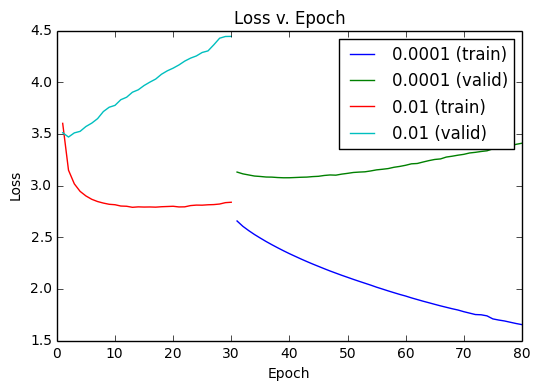

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

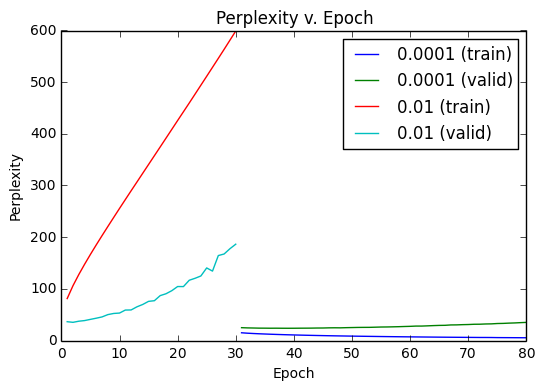

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  italian mocha tiramisu <begin_ingredients> 1 / 4 cup instant coffee granules <ing> 2 tablespoons sugar <ing> 1 / 2 cup boiling water <ing> 1 ( 8 ounce ) package cream cheese , softened <ing> 1 / 2 cup powdered sugar <ing> 1 cup whipping cream <ing> 2 ( 3 ounce ) packages ladyfingers <ing> 1 ounce semi - sweet chocolate baking square ( or chocolate of your choice ) <end>

Gend:  <beg> combine first 4 ingredients in a medium bowl , stirring to combine . <step> add sugar and stir until smooth . <step> pour into a greased 9 x 13 baking dish . <step> bake at 350 degrees for about 45 minutes . <step> remove from oven . <step> remove from cookie sheet and place on

True:  stir together instant coffee , sugar and water . set aside . <step> in a large mixer bowl , beat cream cheese until light and fluffy ( 2 - 3 minutes ) . <step> add powdered sugar and whipping cream . <step> continue beating until stiff peaks form ( 6 - 8 minutes ) . <step> by hand , gently stir in 2 tablespoons of co

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  spinach with chickpeas <begin_ingredients> 2 pounds baby spinach <ing> 3 tablespoons extra - virgin olive oil , divided <ing> 1 medium red onion , finely chopped <ing> 5 cloves garlic , minced <ing> 1 19 - ounce can chickpeas , rinsed <ing> 1 1 / 2 teaspoons dried thyme <ing> 1 1 / 2 teaspoons dried oregano <ing> 1 1 / 2 teaspoons ground cumin <ing> 1 teaspoon kosher salt <ing> 1 / 2 teaspoon hot paprika <ing> 1 / 2 cup golden raisins <ing> 1 / 2 cup reduced - sodium chicken broth , or vegetable broth <end>

Gend:  <beg> 1 . heat a large skillet over medium - high heat . add oil to pan ; swirl to coat . add garlic ; cook 1 minute , stirring constantly . add wine and next 5 ingredients ( through bay leaf ) ; bring to a boil . reduce heat to medium - low ,

True:  1 . rinse spinach and let drain in a colander . with water still clinging to it , place half the spinach in a dutch oven over medium heat . cook , tossing with tongs and adding the remaining spinach by the handful until

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  tasty green bean casserole <begin_ingredients> 1 ( 16 ounce ) package frozen whole green beans , thawed <ing> 4 slices bacon <ing> 1 / 2 medium onion , chopped <ing> 1 / 2 red bell pepper , seeded and diced <ing> 1 / 4 cup dry white wine or vermouth <ing> 1 / 4 cup milk <ing> 2 tablespoons butter <ing> 1 ( 10.75 ounce ) can condensed cream of mushroom soup <ing> 1 tablespoon soy sauce <ing> salt and pepper to taste <ing> salt and pepper to taste <ing> 1 / 2 cup shredded mozzarella cheese <ing> 1 / 2 cup canned french fried onions <end>

Gend:  <beg> heat oven to 350 degrees . <step> in a large bowl , combine the ground beef , onion , cheese , egg , onion , pepper , and salt and pepper to taste , and mix well . <step> spread the mixture evenly in the bottom of a greased 13x9 baking dish . <step> bake

True:  preheat the oven to 325 degrees f ( 165 degrees c ) . <step> fry bacon in a skillet over medium - high heat until crisp . drain on paper towels , crumble , and set aside . d